In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
mba_salary_df = pd.read_csv( "C:\Jupyter Notebook\DSDBA\MBA Salary.csv" )
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [2]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [7]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------- ----- 8.4/9.9 MB 43.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 44.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [10]:
!conda install -c conda-forge statsmodels -y


'conda' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
import statsmodels.api as sm
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [14]:
Y = mba_salary_df['Salary']
print(Y)

0     270000
1     200000
2     240000
3     250000
4     180000
5     300000
6     260000
7     235000
8     425000
9     240000
10    250000
11    180000
12    428000
13    450000
14    300000
15    240000
16    252000
17    280000
18    231000
19    224000
20    120000
21    260000
22    300000
23    120000
24    120000
25    250000
26    180000
27    218000
28    360000
29    150000
30    250000
31    200000
32    300000
33    330000
34    265000
35    340000
36    177600
37    236000
38    265000
39    200000
40    393000
41    360000
42    300000
43    250000
44    360000
45    180000
46    180000
47    270000
48    240000
49    300000
Name: Salary, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.8, random_state = 100 )
mba_salary_lm = sm.OLS( train_y, train_X ).fit()
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [19]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-03-03 12:10      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [20]:
pred_y = mba_salary_lm.predict(test_X)
print(pred_y.head())

6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
dtype: float64


In [26]:
r_squared = mba_salary_lm.rsquared
print("R-squared:",r_squared)


R-squared: 0.21100213796791278


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 5396084152.419214


<Figure size 800x600 with 0 Axes>

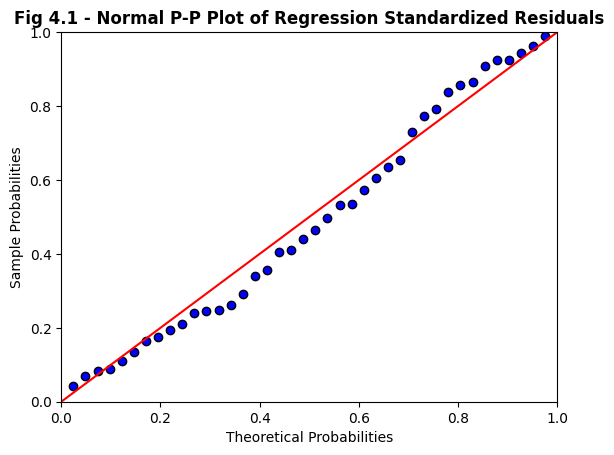

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

mba_salary_resid = mba_salary_lm.resid  
standardized_residuals = (mba_salary_resid - np.mean(mba_salary_resid)) / np.std(mba_salary_resid)
probplot = sm.ProbPlot(standardized_residuals)
plt.figure(figsize=(8, 6))

probplot.ppplot(line='45', markersize=6, markerfacecolor='blue', markeredgecolor='black')

plt.title("Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals", fontsize=12, fontweight='bold')
plt.xlabel("Theoretical Probabilities")
plt.ylabel("Sample Probabilities")

plt.show()